In [34]:
import numpy as np
import matplotlib.pylab as pl
import pylab
import torch
import ot

from generate_data import make_data
from minS_parallel import upperW2
from utils import random_slice,sort_to_plan

In [46]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device='cpu'
torch.CUDA_LAUNCH_BLOCKING=1

print('Used device: '+device)

Used device: cpu


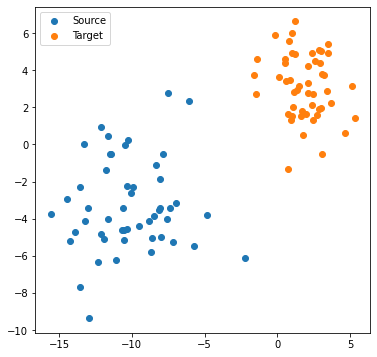

In [47]:
n=50
dim=2
xs,xt=make_data('gaussians',n,dim)


pl.figure(figsize=(6,6))
pl.scatter(xs[:, 0], xs[:, 1], c='C0', label='Source')
pl.scatter(xt[:, 0], xt[:, 1], c='C1', label='Target')
pl.legend(loc=2)

In [48]:
X = torch.from_numpy(xs).to(device)
Y = torch.from_numpy(xt).to(device)

X=X.float()
Y=Y.float()

In [49]:
n_proj=20
theta=random_slice(n_proj,dim).T
print(theta.shape)

torch.Size([2, 20])


In [50]:
#minS
W,u,v=upperW2(X,Y,theta)
P_l=[sort_to_plan(u[:,i],v[:,i]) for i in range(n_proj)]
print('minS = ',torch.min(W))
idx=torch.argmin(W)
P=sort_to_plan(u[:,idx],v[:,idx])


#The exact Wasserstein distance
C=ot.dist(xs,xt)
a, b = np.ones((n,))/n, np.ones((n,))/n
print('W = ',ot.emd2(a,b,C))

minS =  tensor(193.7224)
W =  188.53737627324486
